**IMPORT** **LIBRARIES**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import pandas as pd

**LOADING DATASET**

In [0]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

**DATA** **PREPROCESSING**

In [211]:
def preprocessing(X, Y):
    df = pd.DataFrame(X)
    # print(df.describe())
    df.fillna(df.mean(), inplace=True)
    df1=pd.DataFrame(Y)
    # print(df1.describe())
    df1.fillna(df1.mean(), inplace=True)
preprocessing(train, test)
test.head(5)

,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0.1,5,1,174,Unnamed: 13,72,119,23
0,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
1,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
2,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
3,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43
4,CR_81654,25-MAR-01,0,47,48,7,3,4,2,1,6,1,0,0.0,34,29,34


In [212]:
train.head(5)

,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1.1,6.1,1.2,174,1.0,92,29,36.1,0.1
0,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
1,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
2,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
3,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1
4,CR_96263,07-APR-03,0,45,45,10,3,1,0,1,6,1,303,1.0,72,62,34,1


In [213]:
print(np.shape(train), train.shape[1]-1)

(23855, 18) 17


In [0]:
X, Y = train.iloc[0:, 2:train.shape[1]-1], train.iloc[0:, train.shape[1]-1:train.shape[1]]

In [215]:
print(np.shape(Y))
print(np.shape(X))

(23855, 1)
(23855, 15)


In [216]:
print(X, Y)

       0  36  34   2  1   5   6  1.1  6.1  1.2  174  1.0   92   29  36.1
0      1  37  37   0  0  11  17    1    6    1  236  1.0  103  142    34
1      0   3   2   3  5   1   0    2    3    1  174  1.0  110   93    34
2      0  33  32   2  1   7   1    1    6    1  249  1.0   72   29    34
3      0  33  32   2  1   8   3    0    5    1  174  0.0  112   29    43
4      0  45  45  10  3   1   0    1    6    1  303  1.0   72   62    34
...   ..  ..  ..  .. ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   ...
23850  1  47  48   7  3  15  10    1    5    1  174  0.0   98   29    34
23851  0  33  32   2  1   5   6    0    5    1  174  0.0  112   29    43
23852  0  25  25   9  0   3   5    1    6    1  174  0.0   10   29    18
23853  0  39  39   6  5   2   7    1    6    1  127  0.0  112  103    43
23854  7  36  34   2  1   9   8    0    5    1  249  1.0   92   29    34

[23855 rows x 15 columns]        0.1
0        1
1        1
2        1
3        1
4        1
...    ...
23850    1
23851    

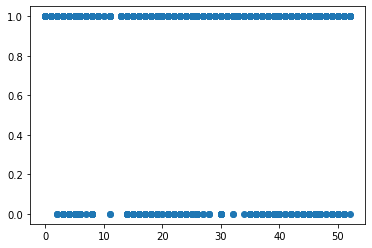

In [217]:
plt.scatter(X.iloc[0:,1:2], Y)

In [0]:
def guasian(X, Y):
    m=Y.shape[0]
    mu = np.sum(X,axis=0)
    mu=np.divide(mu,m)
    return mu
mu=guasian(X, Y)

In [219]:
def normalization(X):
    m=X.shape[0]
    # mean=np.sum(X, axis=0, keepdims=True)/m
    print(X)
    X = X / 250
    print(X)
normalization(X)
    

       0  36  34   2  1   5   6  1.1  6.1  1.2  174  1.0   92   29  36.1
0      1  37  37   0  0  11  17    1    6    1  236  1.0  103  142    34
1      0   3   2   3  5   1   0    2    3    1  174  1.0  110   93    34
2      0  33  32   2  1   7   1    1    6    1  249  1.0   72   29    34
3      0  33  32   2  1   8   3    0    5    1  174  0.0  112   29    43
4      0  45  45  10  3   1   0    1    6    1  303  1.0   72   62    34
...   ..  ..  ..  .. ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   ...
23850  1  47  48   7  3  15  10    1    5    1  174  0.0   98   29    34
23851  0  33  32   2  1   5   6    0    5    1  174  0.0  112   29    43
23852  0  25  25   9  0   3   5    1    6    1  174  0.0   10   29    18
23853  0  39  39   6  5   2   7    1    6    1  127  0.0  112  103    43
23854  7  36  34   2  1   9   8    0    5    1  249  1.0   92   29    34

[23855 rows x 15 columns]
           0     36     34      2      1  ...    174    1.0     92     29   36.1
0      0.004  0.

**LOGISTIC REGRESSION**

In [0]:
def sigmoid(z):
    A=1/(1+np.exp(-z))
    return A

**COST COMPUTATION**

In [0]:
def compute_cost(A, Y):
    m=  Y.shape[0]
    pro1=np.dot(np.log(A), Y)
    pro2=np.dot(np.log(1-A), 1-Y)
    cost = -(pro1+pro2)/m
    return cost

**GRADIENT DESCENT**

In [0]:
def gradient(X, A, Y):
    param = {}
    m = Y.shape[0]
    dw = np.dot((A - np.transpose(Y)), X)/m
    db = np.sum(A - np.transpose(Y), axis=1)/m
    param["dw"]=dw
    param["db"]=db
    return param

**MODEL**

In [223]:
def model(X_in,Y_in):
    m= Y_in.shape[0]
    # print("m= ", m)
    W=np.zeros((1, X_in.shape[1]))
    b=np.zeros((1,1))
    Z= np.dot(W, np.transpose(X_in)) + b
    A=sigmoid(Z)
    cost= compute_cost(A, Y_in)
    print("Initial Cost = ", cost)
    param  = gradient(X_in, A, Y_in)
    print("dw = ", param["dw"], "db = ", param["db"])
    alpha = 0.0008
    j=1
    for i in range(1000):
        param = gradient(X_in, A, Y_in)
        dw = param["dw"]
        db = param["db"]
        # print("db = "+ str(db), "end")
        W = W - alpha * dw
        # b = b - alpha * db
        # if (i==100*j):
        Z = np.dot(W, np.transpose(X_in)) + b
        A = sigmoid(Z)
        cost = compute_cost(A, Y_in)
        print("Cost after ", i, " iteration  = ", cost)
    grads={}
    grads["W"] = W
    return grads
grads = model(X,Y)

Initial Cost =  [[0.69314718]]
dw =  [[ -0.22441836 -11.2009432  -11.13173339  -1.94525257  -1.11653741
   -2.79448753  -2.21370782  -0.43269755  -2.24162649  -0.51056382
  -96.24160553  -0.41627079 -38.84345001 -32.94892056 -15.31349822]] db =  0.1   -0.455271
dtype: float64
Cost after  0  iteration  =  [[0.80587825]]
Cost after  1  iteration  =  [[0.74040589]]
Cost after  2  iteration  =  [[0.67542599]]
Cost after  3  iteration  =  [[0.61117581]]
Cost after  4  iteration  =  [[0.54800037]]
Cost after  5  iteration  =  [[0.48638128]]
Cost after  6  iteration  =  [[0.42694852]]
Cost after  7  iteration  =  [[0.37045359]]
Cost after  8  iteration  =  [[0.31773643]]
Cost after  9  iteration  =  [[0.26994565]]
Cost after  10  iteration  =  [[0.22971295]]
Cost after  11  iteration  =  [[0.2031703]]
Cost after  12  iteration  =  [[0.19376733]]
Cost after  13  iteration  =  [[0.19034144]]
Cost after  14  iteration  =  [[0.1882047]]
Cost after  15  iteration  =  [[0.18682459]]
Cost after  16 

**PREDICTION WITH UPDATED PARAMETERS**

In [224]:
def predict(grads, X):
    X = (X-np.mean(X, axis=0))
    W = grads["W"]
    Z = np.dot(W, np.transpose(X))
    A = sigmoid(Z)
    AT= np.transpose(A)
    y=np.zeros((X.shape[0],1))
    # print(A)
    for i in range(len(AT)):
        if AT[i]>0.5:
            y[i]=1
    return y
y = predict(grads, X)
print(np.shape(y))


(23855, 1)


In [235]:
m= X.shape[0]
su= y-Y
df1=pd.DataFrame(su)
df1.replace(to_replace=-1, value=1)
accuracy = (100 - (np.sum(df1, axis=0)/m)*100)
print(accuracy)

0.1    132.902955
dtype: float64


In [228]:
Test = test.iloc[0:, 2:test.shape[1]]
print(np.shape(Test))

(15902, 15)


In [204]:
np.shape(y_final)

(15902, 1)

In [205]:
cr = test.iloc[0:, 0:1]
print(np.shape(cr))
cr.head(10)

(15902, 1)


,CR_195453
0,CR_103520
1,CR_196089
2,CR_112195
3,CR_149832
4,CR_81654
5,CR_139009
6,CR_6108
7,CR_62283
8,CR_5710
9,CR_188972


**PREDICTION FOR TEST.CSV FILE**

In [206]:
y_final = predict(grads, Test)
# y_final = np.transpose(y_final)

[[0.49662941 0.57999917 0.5420737  ... 0.2299293  0.55854272 0.54618043]]


In [207]:
fin = np.append(cr , y_final, axis = 1)
print(fin)

[['CR_103520' 0.0]
 ['CR_196089' 1.0]
 ['CR_112195' 1.0]
 ...
 ['CR_115946' 0.0]
 ['CR_137663' 1.0]
 ['CR_33545' 1.0]]


In [0]:
df = pd.DataFrame(fin)
df.to_csv('final4.csv', index=False)